In [53]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
- Label Encoding ( categorical to number may be order )
- Ordinal Encoding
- hot encoding


In [54]:
# data
df={"Color":["Red","Green","Blue","Red"] ,
      "Size":["Small","Medium","Large","Large"] ,
      "Marital_status":["Single","Married","Relationship","Single"]}
df=pd.DataFrame(df)
df

,Color,Size,Marital_status
0,Red,Small,Single
1,Green,Medium,Married
2,Blue,Large,Relationship
3,Red,Large,Single


In [55]:
# Label Encoding in Color column because here we can randomly assign the numerical value

from sklearn.preprocessing import LabelEncoder

# Creating a object
le = LabelEncoder()
df["Color"]=le.fit_transform(df["Color"])
df

,Color,Size,Marital_status
0,2,Small,Single
1,1,Medium,Married
2,0,Large,Relationship
3,2,Large,Single


In [56]:
# Ordinal Encoding when you want to follow a order in your encoded data

from sklearn.preprocessing import OrdinalEncoder
# Define the order of values
Oe = OrdinalEncoder(categories=[["Small","Medium","Large"]])

df["Size"]=Oe.fit_transform(df[["Size"]])
df

,Color,Size,Marital_status
0,2,0.0,Single
1,1,1.0,Married
2,0,2.0,Relationship
3,2,2.0,Single


In [57]:
# dataset
data=pd.read_csv("bank-additional-full.csv",sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
data.shape

(41199, 21)

In [59]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [60]:
# describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41195.0,40.030319,10.431818,17.000,32.000,38.000,47.000,98.000
duration,41196.0,258.281265,259.254211,0.000,102.000,180.000,319.000,4918.000
campaign,41196.0,2.567676,2.769751,1.000,1.000,2.000,3.000,56.000
pdays,41196.0,962.482547,186.893451,0.000,999.000,999.000,999.000,999.000
previous,41196.0,0.173124,0.494987,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41196.0,0.081656,1.570894,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41195.0,93.575867,0.578999,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41196.0,-40.504600,4.629972,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41196.0,3.620787,1.734655,0.634,1.344,4.857,4.961,5.045
nr.employed,41196.0,5166.996405,72.300104,4963.600,5099.100,5191.000,5228.100,5228.100


In [61]:
# null
data.isnull().sum()

,0
age,4
job,5
marital,5
education,5
default,4
housing,3
loan,4
contact,4
month,3
day_of_week,3


In [62]:
# drop null
data.dropna(inplace=True)

In [63]:
data.shape

(41190, 21)

In [64]:
# isnull
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [65]:
# duplicate
data.duplicated().sum()


13

In [66]:
# remove duplicate
data.drop_duplicates(inplace=True)

In [67]:
# duplicate
data.duplicated().sum()

0

In [68]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41177 entries, 0 to 41193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41177 non-null  float64
 1   job             41177 non-null  object 
 2   marital         41177 non-null  object 
 3   education       41177 non-null  object 
 4   default         41177 non-null  object 
 5   housing         41177 non-null  object 
 6   loan            41177 non-null  object 
 7   contact         41177 non-null  object 
 8   month           41177 non-null  object 
 9   day_of_week     41177 non-null  object 
 10  duration        41177 non-null  float64
 11  campaign        41177 non-null  float64
 12  pdays           41177 non-null  float64
 13  previous        41177 non-null  float64
 14  poutcome        41177 non-null  object 
 15  emp.var.rate    41177 non-null  float64
 16  cons.price.idx  41177 non-null  float64
 17  cons.conf.idx   41177 non-null  floa

In [69]:
col=data.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

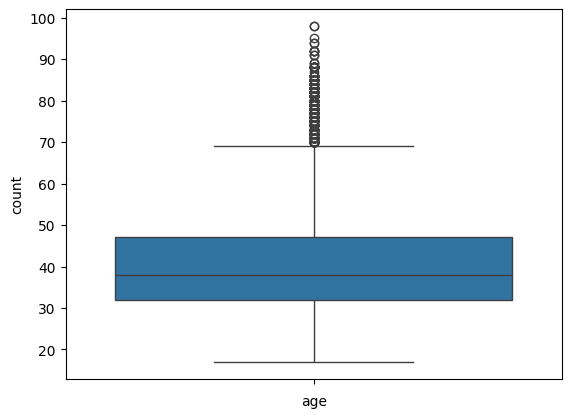

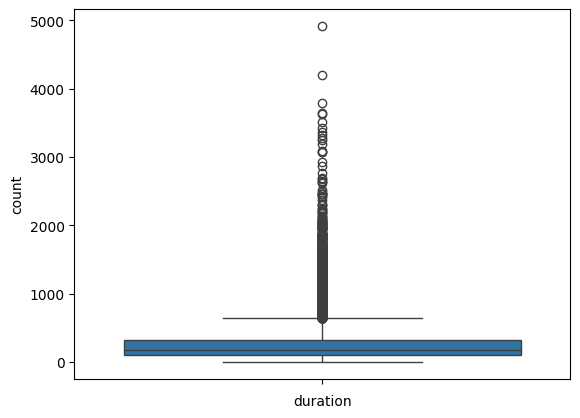

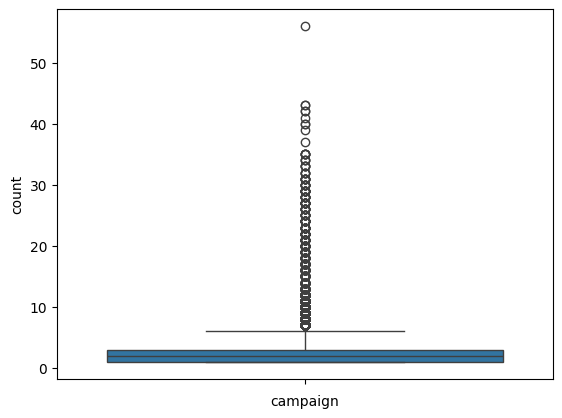

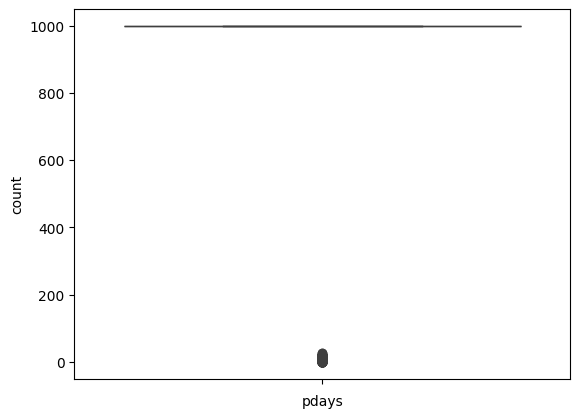

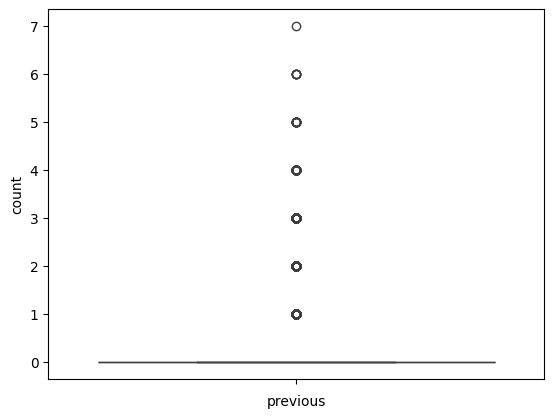

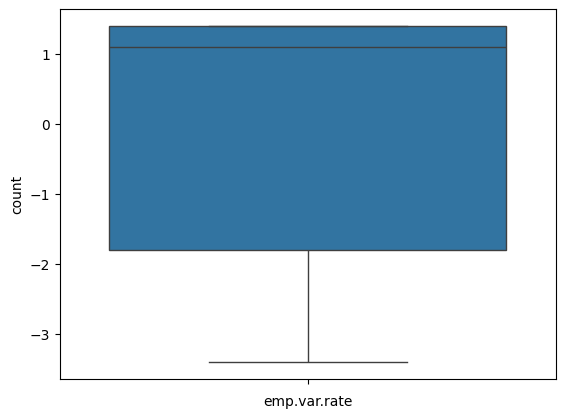

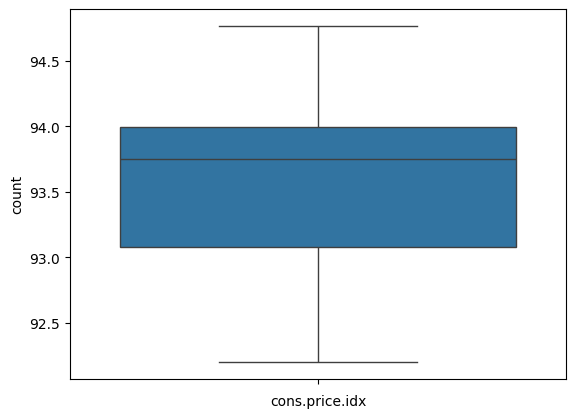

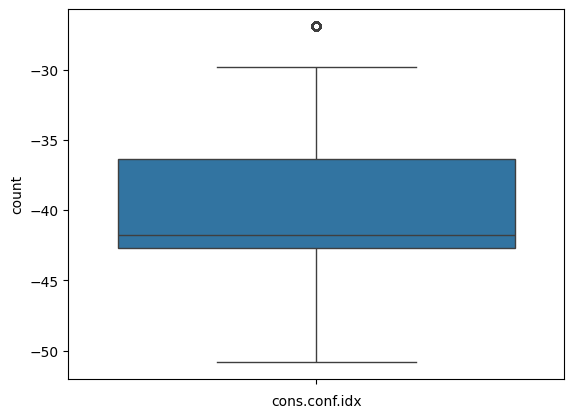

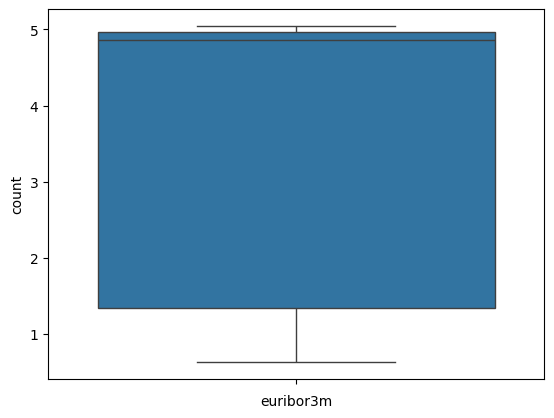

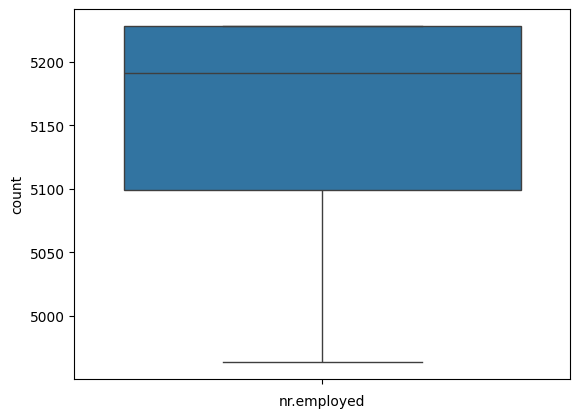

In [70]:
# box plot
for i in col:
    if data[i].dtypes=="int64" or data[i].dtypes=="float64":
      sns.boxplot(data[i])
      plt.xlabel(i)
      plt.ylabel("count")
      plt.show()

# with reference of above plot columns have outlier
- 1. age
- 2. duration
- 3. campaign
- 4. cons.conf.idx

In [71]:
col_names=['age','duration','campaign','cons.conf.idx']

# Function to remove outliers using IQR
def remove_outliers_iqr(data, col_names):
    for col in col_names:
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range

        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data

# Remove outliers
data = remove_outliers_iqr(data, col_names)

print("\nDataFrame after removing outliers:\n", data)



DataFrame after removing outliers:
         age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41181  37.0       admin.  married    university.degree       no     yes   no   
41182  29.0   unemployed   single             basic.4y       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   

  

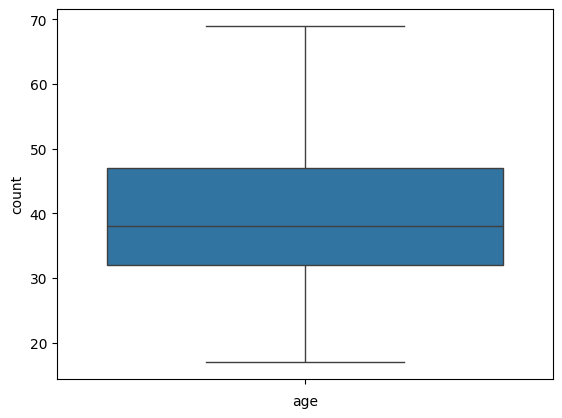

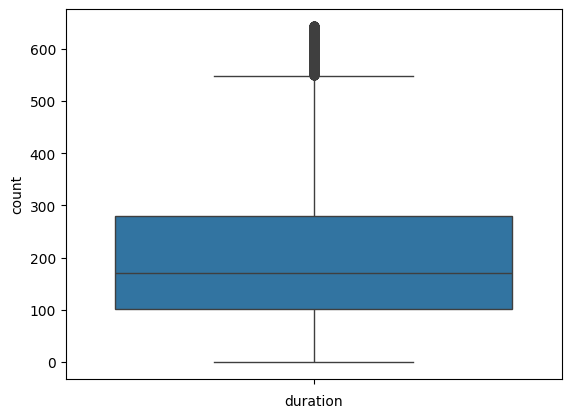

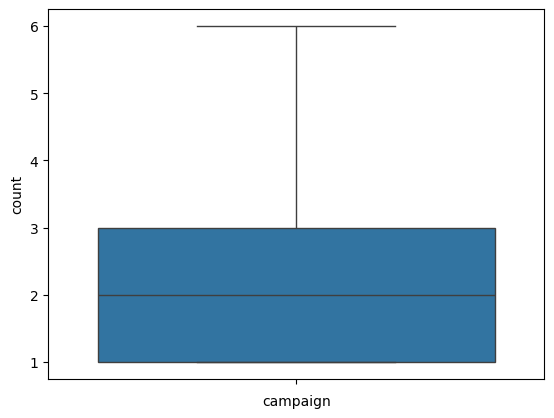

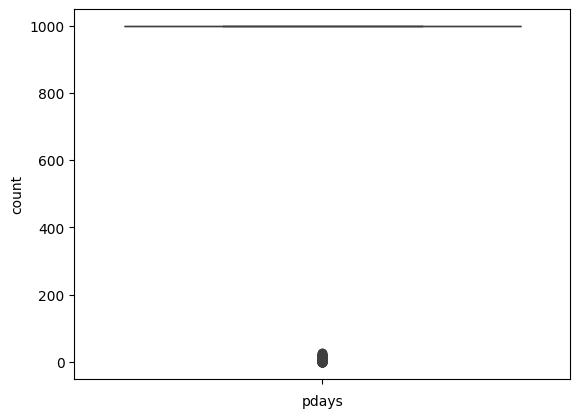

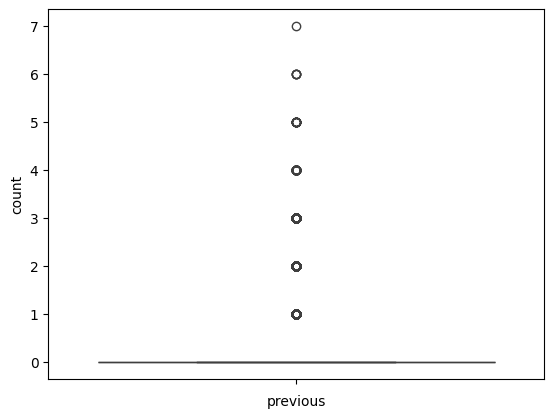

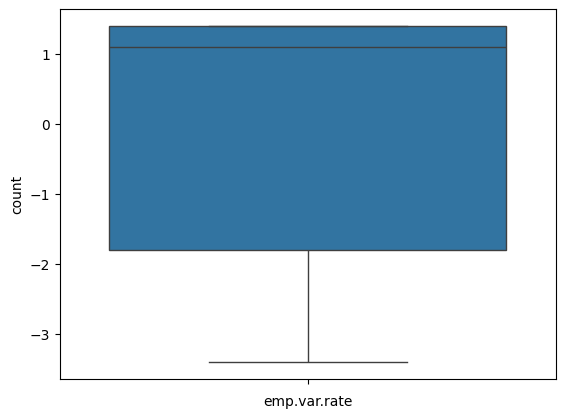

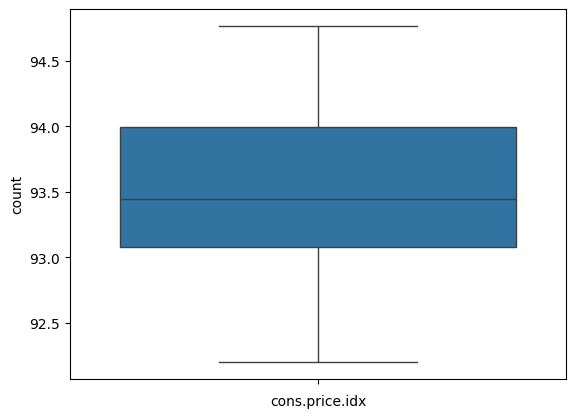

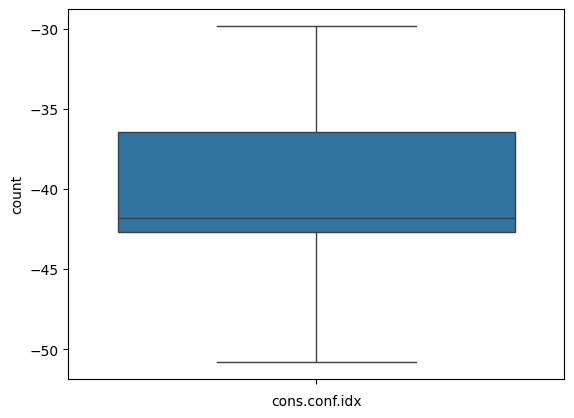

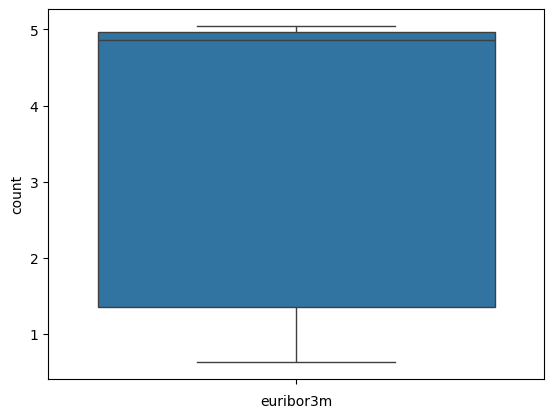

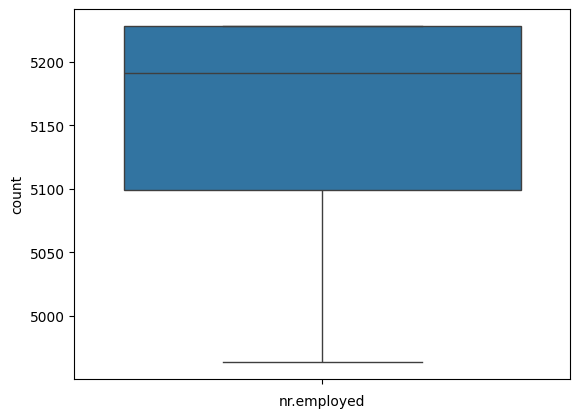

In [72]:
# recheck outlier
# box plot
for i in col:
    if data[i].dtypes=="int64" or data[i].dtypes=="float64":
      sns.boxplot(data[i])
      plt.xlabel(i)
      plt.ylabel("count")
      plt.show()

In [73]:
# isnull
data.isnull().sum().sum()

0

In [74]:
# unique
data.nunique()

,0
age,53
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [75]:
data['y'].value_counts()

,count
y,
no,32435
yes,2730


In [76]:
# 1 for yes , 0 for no
data['y']=data['y'].map({'yes':1,'no':0})

In [77]:
data['y']=data['y'].astype(str)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35165 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35165 non-null  float64
 1   job             35165 non-null  object 
 2   marital         35165 non-null  object 
 3   education       35165 non-null  object 
 4   default         35165 non-null  object 
 5   housing         35165 non-null  object 
 6   loan            35165 non-null  object 
 7   contact         35165 non-null  object 
 8   month           35165 non-null  object 
 9   day_of_week     35165 non-null  object 
 10  duration        35165 non-null  float64
 11  campaign        35165 non-null  float64
 12  pdays           35165 non-null  float64
 13  previous        35165 non-null  float64
 14  poutcome        35165 non-null  object 
 15  emp.var.rate    35165 non-null  float64
 16  cons.price.idx  35165 non-null  float64
 17  cons.conf.idx   35165 non-null  floa

In [79]:
data['age'].value_counts()

,count
age,
31.0,1693
33.0,1580
32.0,1579
35.0,1537
36.0,1528
34.0,1528
30.0,1458
37.0,1267
29.0,1254


In [80]:
# data
bins = [0,50,100]
data['age'] = pd.cut(data['age'], bins)
data['age'] = data.age.astype(str)

In [81]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(0, 50]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(0, 50]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(0, 50]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [82]:
col_list=data.columns
col_list

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [83]:
# isnull
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [84]:
for col in col_list:
  if data[col].dtypes == 'object':
    data[col] = data[col].fillna(data[col].mode()[0])
  else:
    data[col] = data[col].fillna(data[col].mean())

In [85]:
data['marital'].value_counts()

,count
marital,
married,21276
single,9948
divorced,3881
unknown,60


In [86]:
import statistics as stats
import numpy as np

stats.mode(data['marital'])       # mode

'married'

In [87]:
# fill marital with mode
data["marital"].mode()[0]  # married ( 0 )

'married'

In [88]:
# unique
data.nunique()

,0
age,2
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [89]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [90]:
col_list = list(data.columns)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [91]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [92]:
for i in col_list:
  data[i] = labelencoder.fit_transform(data[i])

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35165 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             35165 non-null  int64
 1   job             35165 non-null  int64
 2   marital         35165 non-null  int64
 3   education       35165 non-null  int64
 4   default         35165 non-null  int64
 5   housing         35165 non-null  int64
 6   loan            35165 non-null  int64
 7   contact         35165 non-null  int64
 8   month           35165 non-null  int64
 9   day_of_week     35165 non-null  int64
 10  duration        35165 non-null  int64
 11  campaign        35165 non-null  int64
 12  pdays           35165 non-null  int64
 13  previous        35165 non-null  int64
 14  poutcome        35165 non-null  int64
 15  emp.var.rate    35165 non-null  int64
 16  cons.price.idx  35165 non-null  int64
 17  cons.conf.idx   35165 non-null  int64
 18  euribor3m       35165 non-null 

# VIF ( Variance Inflation Factor )

- VIF , variance inflation factor - Generally we calculate the correlation amongst all the columns ,dropping the columns having values grrater than 6 .

- VIF equal to 1 = variables are not correlated

- VIF between 1 and 5 = variables are moderately correlated

- VIF greater than 5 = variables are highly correlated

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
x = data[col_list]

vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           Feature         VIF
0              age    1.282453
1              job    2.100846
2          marital    5.063591
3        education    4.538771
4          default    1.388673
5          housing    2.209010
6             loan    1.207613
7          contact    4.712524
8            month    5.598193
9      day_of_week    3.092497
10        duration    3.459817
11        campaign    1.691562
12           pdays   68.788068
13        previous    2.108226
14        poutcome   12.648091
15    emp.var.rate  161.777637
16  cons.price.idx   67.799469
17   cons.conf.idx   10.278106
18       euribor3m  146.838399
19     nr.employed  146.471293
20               y    1.545548


# can't drop vif>5 , drop one by one if atonce drop varies

In [96]:
col_list = []

for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'y')):
    col_list.append(col)

In [97]:
x=data[col_list]
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,17,16,278,8
1,1,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,17,16,278,8
2,0,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,17,16,278,8
3,0,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,17,16,278,8
4,1,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,17,16,278,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281,0,26,0,1,5,24,0,162,0
41182,0,10,2,0,0,2,0,0,7,0,112,0,9,1,2,5,24,0,162,0
41184,0,1,1,5,0,0,0,0,7,0,383,0,26,0,1,5,24,0,162,0
41185,1,5,1,6,0,2,0,0,7,0,189,1,26,0,1,5,24,0,162,0


In [98]:
vif_data = pd.DataFrame()

vif_data["Feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           Feature         VIF
0              age    1.281111
1              job    2.100733
2          marital    5.059991
3        education    4.527656
4          default    1.387287
5          housing    2.208880
6             loan    1.207600
7          contact    4.679860
8            month    5.586614
9      day_of_week    3.090844
10        duration    3.229166
11        campaign    1.691478
12           pdays   68.787990
13        previous    2.071303
14        poutcome   12.127375
15    emp.var.rate  161.110222
16  cons.price.idx   67.331773
17   cons.conf.idx   10.219120
18       euribor3m  145.955884
19     nr.employed  146.469514


In [99]:
data = data.drop(['emp.var.rate'], axis = 1)

In [100]:
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'y')):
    col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           Feature         VIF
0              age    1.281058
1              job    2.100723
2          marital    5.052021
3        education    4.527270
4          default    1.386071
5          housing    2.208815
6             loan    1.207381
7          contact    3.391817
8            month    5.420240
9      day_of_week    3.090364
10        duration    3.211886
11        campaign    1.691477
12           pdays   34.407818
13        previous    1.566943
14        poutcome    8.913199
15  cons.price.idx   16.502396
16   cons.conf.idx    5.003429
17       euribor3m  130.821996
18     nr.employed   83.274889


In [101]:
data = data.drop(['euribor3m'], axis = 1)

In [102]:
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'y')):
    col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   1.279163
1              job   2.100197
2          marital   5.050584
3        education   4.527135
4          default   1.383272
5          housing   2.208635
6             loan   1.207366
7          contact   3.387716
8            month   5.397475
9      day_of_week   3.089495
10        duration   3.211437
11        campaign   1.691150
12           pdays  31.084314
13        previous   1.565473
14        poutcome   8.794713
15  cons.price.idx  14.451165
16   cons.conf.idx   4.942923
17     nr.employed  19.680642


In [103]:
data = data.drop(['pdays'], axis = 1)

In [104]:
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'y')):
    col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   1.265673
1              job   2.084354
2          marital   4.629652
3        education   4.329641
4          default   1.381461
5          housing   2.148326
6             loan   1.204422
7          contact   3.283493
8            month   4.352642
9      day_of_week   3.037114
10        duration   3.077836
11        campaign   1.673884
12        previous   1.521220
13        poutcome   8.288636
14  cons.price.idx  13.950281
15   cons.conf.idx   4.709475
16     nr.employed  13.133057


In [105]:
data = data.drop(['cons.price.idx'], axis = 1)

In [106]:
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'y')):
    col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

          Feature       VIF
0             age  1.264850
1             job  2.082484
2         marital  4.620322
3       education  4.325001
4         default  1.376906
5         housing  2.148195
6            loan  1.204258
7         contact  2.139508
8           month  4.343011
9     day_of_week  3.034954
10       duration  3.057702
11       campaign  1.672047
12       previous  1.416930
13       poutcome  7.550779
14  cons.conf.idx  4.594026
15    nr.employed  9.303215


In [107]:
data = data.drop(['nr.employed'], axis = 1)

In [108]:
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'y')):
    col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

          Feature       VIF
0             age  1.258222
1             job  2.064852
2         marital  4.448303
3       education  4.132629
4         default  1.316599
5         housing  2.110467
6            loan  1.200248
7         contact  2.117606
8           month  4.317016
9     day_of_week  2.903048
10       duration  3.002872
11       campaign  1.621755
12       previous  1.329711
13       poutcome  7.018360
14  cons.conf.idx  4.549090


In [109]:
data = data.drop(['poutcome'], axis = 1)

In [110]:
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'y')):
    col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

          Feature       VIF
0             age  1.246856
1             job  2.053422
2         marital  4.225766
3       education  3.995966
4         default  1.309854
5         housing  2.084965
6            loan  1.198372
7         contact  2.116029
8           month  4.189384
9     day_of_week  2.842288
10       duration  2.882747
11       campaign  1.602977
12       previous  1.223668
13  cons.conf.idx  4.172832


In [111]:
# All Vif value >5 droped

In [112]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,cons.conf.idx,y
0,1,3,1,0,0,0,0,1,6,1,261,0,0,16,0
1,1,7,1,3,1,0,0,1,6,1,149,0,0,16,0
2,0,7,1,3,0,2,0,1,6,1,226,0,0,16,0
3,0,0,1,1,0,0,0,1,6,1,151,0,0,16,0
4,1,7,1,3,0,0,2,1,6,1,307,0,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281,0,0,0,1
41182,0,10,2,0,0,2,0,0,7,0,112,0,1,0,0
41184,0,1,1,5,0,0,0,0,7,0,383,0,0,0,0
41185,1,5,1,6,0,2,0,0,7,0,189,1,0,0,0


In [113]:
# dependent , independent
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [115]:
# model
model=LogisticRegression()

In [116]:
rfe = RFE(model)

In [119]:
# fit
rfe.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression())

In [120]:
rfe.support_  # .support_ will give the importance in boolean form True - Keep the colum False - Drop the column

array([ True, False,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True, False])

In [121]:
selected_indices = [i for i, data in enumerate(rfe.support_)if data == True]
selected_indices


for i,data in enumerate(rfe.support_):
  if data==True:
    print(i,data)

0 True
2 True
3 True
4 True
7 True
11 True
12 True


In [122]:
column_names = x.columns

In [123]:
selected_columns = [column_names[i] for i in selected_indices]

In [124]:
selected_columns

['age', 'marital', 'education', 'default', 'contact', 'campaign', 'previous']

In [125]:
x = x.loc[:,['age', 'marital', 'education', 'default', 'contact', 'campaign', 'previous']]

In [128]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


# train test

In [129]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.20, random_state = 45)

In [132]:
from sklearn.linear_model import LogisticRegression

In [134]:
# model
lr = LogisticRegression()

In [135]:
lr.fit(x_train, y_train)

LogisticRegression()

In [136]:
y_pred = lr.predict(x_test)

In [137]:
# accuracy
from sklearn.metrics import accuracy_score

In [138]:
print("Accuracy Score of the mdoel is : ", accuracy_score(y_test,y_pred))

Accuracy Score of the mdoel is :  0.9230769230769231


In [140]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[25869,    60],
       [ 2104,    99]])

<Axes: >

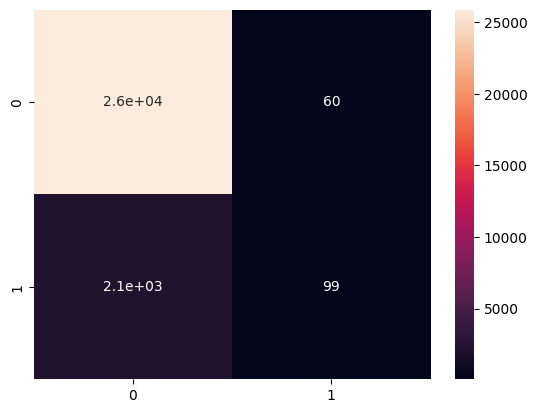

In [141]:
# heatmap
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)